In [12]:
from keras.datasets import mnist

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

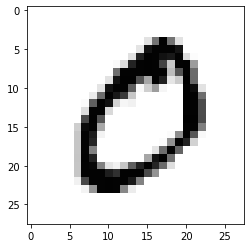

In [16]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1], cmap='Greys')
plt.show()

In [17]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [20]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2579 - acc: 0.9251
Epoch 2/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.1051 - acc: 0.9687
Epoch 3/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0686 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0496 - acc: 0.9850
Epoch 5/5
10000/10000 [==============================] - 0s 45us/step
test_acc: 0.9806
